Our plan is to take two matrices (the matrices `R` and `S` below which we have choosen to be a rotation matrix and a scaling matrix, respectively) and apply all combinations of these two matrices and there inverse to a given vector (`v` below) up to a certain length (`length` below).  You can mess around with these parameters and make your own fun pictures. Or add a third matrix into the mix.  Can you explain any of the patterns?

You might get prettier pictures if you look at all words in the pair of matrices and their inverses that have at most a certain number of each.  This is different than what is below.  Can you modify what is below achieve this?

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos

In [124]:
pi = np.pi
epsilon = np.random.rand()
#theta = pi / 4
# I liked this one:
# theta = 0.21346564394063464
theta = 2*pi*epsilon
R = np.array([[cos(theta), (-1)*sin(theta)],
               [sin(theta), cos(theta)]])

S = np.array([[1.2,0],
              [0,1.2]])

In [125]:
# Generates all words of length 'n' with letters drawn from 'letters'.
def allWords(n, letters):
    if n == 0: return []
    elif n == 1: return letters
    return [w + c for w in allWords(n-1, letters) for c in letters]
#allWords(3, ["a","A","b","B"])

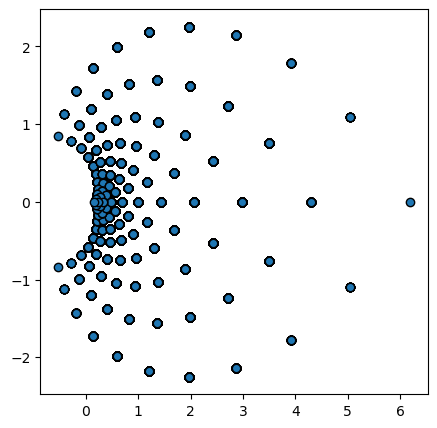

In [126]:
# This takes a while.  It's hitting a vector by a matrix about 10*(4^10) times...

v = np.array([1,0])
points = [v]

length = 10
words = allWords(length,["R","r","S","s"])
Rinv = np.linalg.inv(R)
Sinv = np.linalg.inv(S)
# np.matmul(R,Rinv)

for w in words:
    p = v
    for c in w[::-1]:  # Reverse because of function composition order. 
        if   c == "R": p = R@p
        elif c == "r": p = Rinv@p
        elif c == "S": p = S@p
        elif c == "s": p = Sinv@p
    points.append(p)
    
xs, ys = [p[0] for p in points], [p[1] for p in points] 
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(xs, ys, edgecolor='k')